## 차원 축소
- PCA, LDA, SVD, NMF
- 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원을 생성하는 것
- 차원이 증가할수록 데이터 간 거리가 멀어지고 희소한 구조
- 피처가 많을 경우 다중 공선성 문제
1. 피처 선택 (종속성이 강한 불필요한 피처는 아예 제거하고 데이터의 특성을 잘 나타내는 것만)
2. 피처 추출 (기존 피처를 저차원의 중요 피처로 압축하여 추출)
- 단순히 압축하는 것이 아닌 피처를 함축적으로 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것 ; 기존에 인지가 어려웠던 잠재적 요소 추출
- 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축 형태의 이미지 변환과 압축 수행
- SVD, NMF : 시맨틱 토픽 모델링을 위한 기반 알고리즘

### PCA (Principal Comppnent Analysis)
- 여러 변수에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출하며 차원 축소
- 기존 데이터의 정보 유실이 최소화되는 방향
- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하고 이것이 주성분
1. 데이터 변동성이 가장 큰 방향으로 축 생성
2. 새로운 축으로 데이터 투영
3. 새로운 축 기준으로 데이터 표현
- 첫 번재 축을 가장 큰 데이터 변동성 기반으로 생성하고 두 번째 축은 이 벡터 축의 직교 벡터로 설정, 세 번째는 다시 이 벡터 축과 직교하는 축 생성
- 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터의 차원이 축소됨
- 원본 데이터의 피처 수에 비해 매우 작은 주성분으로 원본의 총 변동성의 대부분을 설명 가능

#### [PCA STEP]
1. 입력 데이터 세트의 공분산 행렬을 생성
2. 공분산 행렬의 고유벡터와 고유값 계산
3. 고유값이 큰 순으로 k개의 고유벡터 추출
4. 고유값이 큰 순으로 추출된 고유벡터를 이용해 입력 데이터 변환

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DF로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


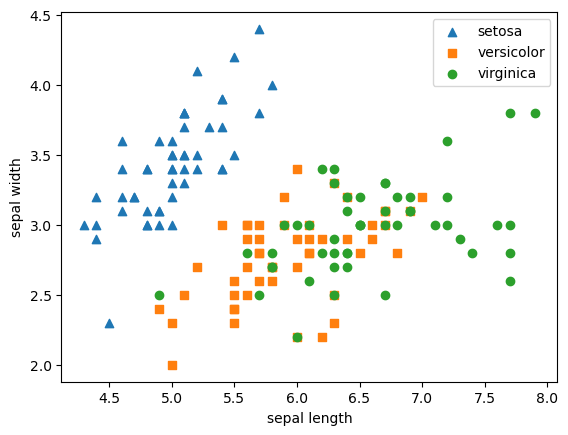

In [3]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']
# setosa의 target 값은 0, versicolor는 , virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers) :
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

# target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [7]:
# pca 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


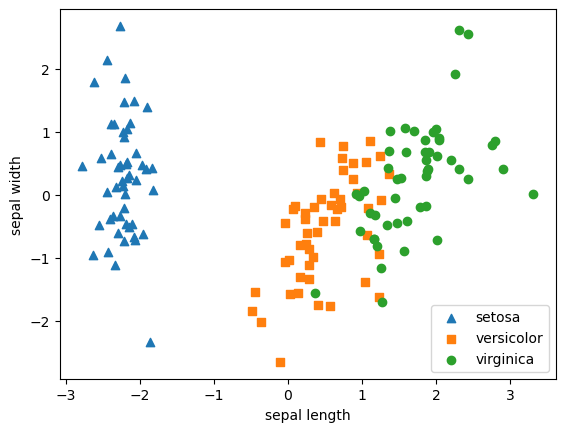

In [10]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 , virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers) :
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

변환 후에도 setosa 품종은 명확히 구분 가능. versicolor와 virginica는 일부 겹치는 부분이 존재

In [11]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, 
                        scoring = 'accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도 :',scores)
print('원본 데이터 평균 정확도 :', np.mean(scores))

원본 데이터 교차 검증 개별 정확도 : [0.98 0.94 0.96]
원본 데이터 평균 정확도 : 0.96


In [14]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target,
                            scoring = 'accuracy', cv=3)
print('pca 변환 데이터 교차 검증 개별 정확도 :', scores_pca)
print('pca 변환 데이터 평균 정확도 : ', np.mean(scores_pca))

pca 변환 데이터 교차 검증 개별 정확도 : [0.88 0.88 0.88]
pca 변환 데이터 평균 정확도 :  0.88


#### 더 많은 피처를 가진 데이터 세트를 적은 pca 컴포넌트 기반 변환한 후 예측 영향도가 어떻게 되는지 비교

In [20]:
# 신용카드 고객 데이터 세트
!pip install xlrd
# header로 의미없는 첫 행 제거, iloc으로 기존 id 제거
import pandas as pd
df = pd.read_excel("credit_card.xls", header=1, sheet_name="Data").iloc[0:,1:]
print(df.shape)
df.head(3)

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/96.5 kB 495.5 kB/s eta 0:00:01
   -------------------------------------- - 92.2/96.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 690.3 kB/s eta 0:00:00
(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [22]:
df.rename(columns = {'PAY_0' : 'PAY_1', 'default payment next month' : 'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

<Axes: >

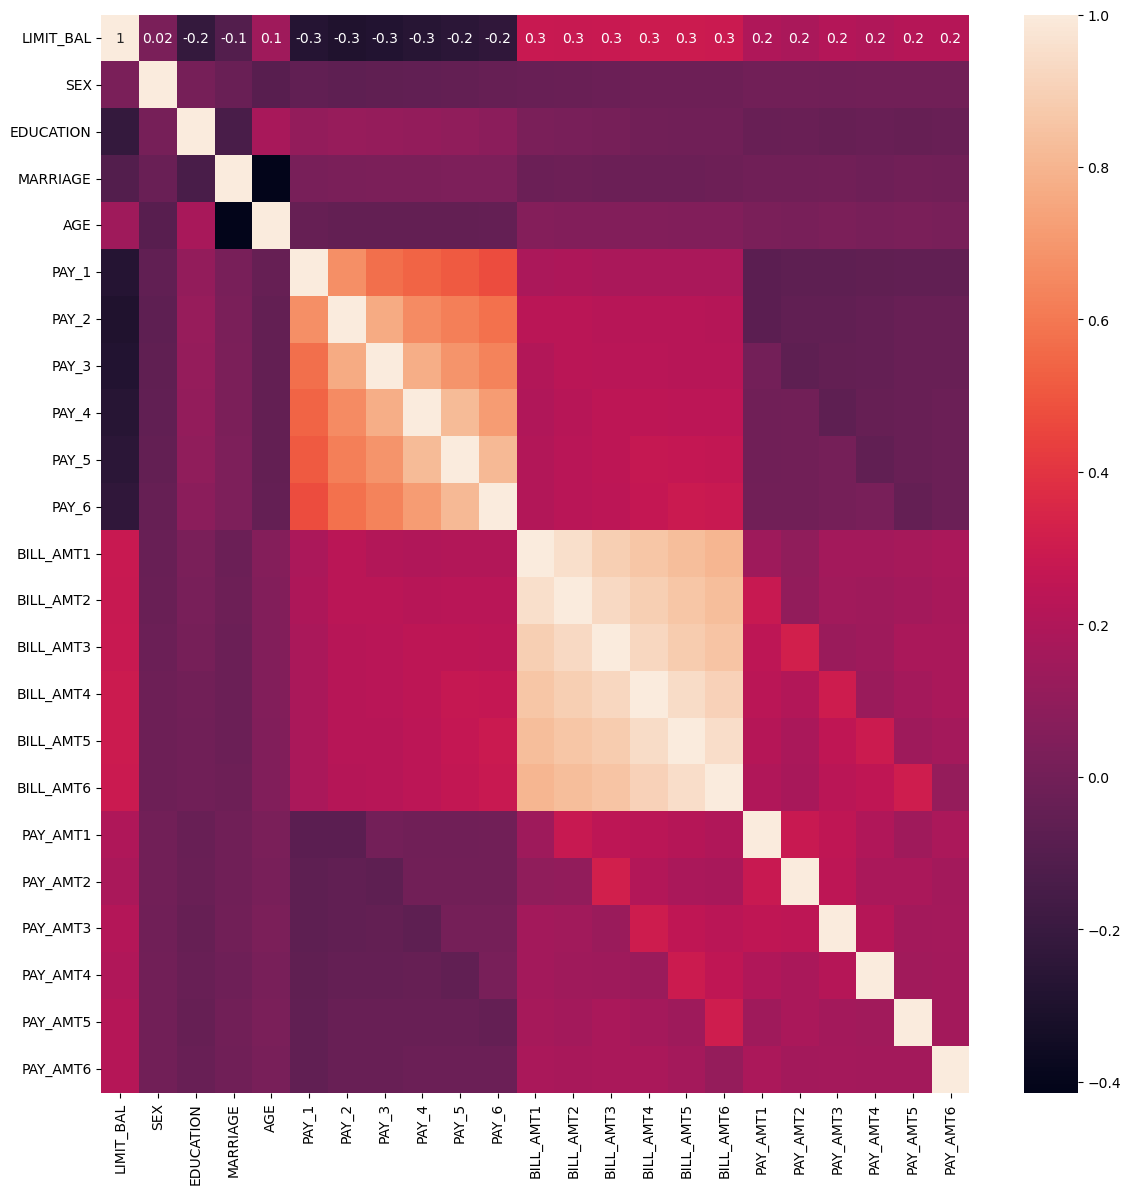

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize = (14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1-BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고 explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)
print('pca component별 변동성 : ', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pca component별 변동성 :  [0.90555253 0.0509867 ]


단 2개의 컴포넌트만으로 6개의 변동성을 약 95% 이상 설명할 수 있음

In [26]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators = 300, random_state = 156)
scores = cross_val_score(rcf, X_features, y_target, scoring = 'accuracy', cv=3)

print('cv=3인 경우 개별 fold 세트별 정확도 : ', scores)
print('평균 정확도  :{0:.4f}'.format(np.mean(scores)))

cv=3인 경우 개별 fold 세트별 정확도 :  [0.8083 0.8196 0.8232]
평균 정확도  :0.8170


In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# 원본 데이터 세트에 먼저 standardscaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 pca 변환을 수행하고 cross_val_score()로 분류 예측
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_scaled)
scored_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy',cv=3)
print('cv=3인 경우의 pca 변환된 개별 fold 세트별 정확도 :',scores_pca)
print('pca 변환 데이터 세트 평균 정확도 : {0:.4f}'.format(np.mean(scores_pca)))

cv=3인 경우의 pca 변환된 개별 fold 세트별 정확도 : [0.88 0.88 0.88]
pca 변환 데이터 세트 평균 정확도 : 0.8800


### LDA (Linear Discriminant Analysis)
#### LDA 개요
- 선형 판별 분석법으로 PCA와 매우 유사
- 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소
- PCA와의 차이는 PCA는 입력 데이터의 변동성의 가장 큰 축을 찾은 반면 LDA의 경우 분류에 사용하기 용이하게 개별 클래스 분별 기준을 최대한 유지
- 클래스 간 분산(Between-class-scatter)와 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원 축소 ; 클래스 간 분산은 max, 클래스 내부 분산은 min

[LDA 과정]
1. 클래스 내부, 클래스 간 분산 행렬을 구함(개별 피처의 평균 벡터 기반)
2. 클래스 내부 행렬, 클래스 간 분산 행렬을 고유벡터로 분해
3. 고유값이 큰 순으로 k개 (변환 차수만큼) 추출
4. 고유값이 큰 순으로 고유 벡터를 이용해 새롭게 입력 데이터 변환

#### 붓꽃 데이터 세트에 LDA 적용하기

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [30]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


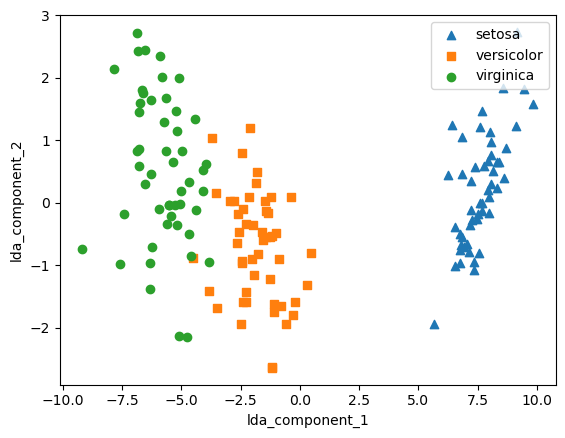

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns =lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 , virginica는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers) :
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()